In [2]:
#Getting Python ready
from scipy.stats import norm
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap
#%matplotlib widget


In [3]:
def aBernoulliExperiment(randomNumGen,bernoulliParam_p=0.5,numRepeatsOfExp=1,numTrialsInAnExp=1,profitLoss=[1,0]):
    repeatIndex=0
    observation=np.ones((numRepeatsOfExp,numTrialsInAnExp))
    # print(observation)
    observation=randomNumGen.random((numRepeatsOfExp,numTrialsInAnExp))
    index_ge1=np.less_equal(observation,bernoulliParam_p)

    observation[index_ge1]=profitLoss[0]
    observation[np.invert(index_ge1)]=profitLoss[1]
    while (repeatIndex < numRepeatsOfExp):
        observation[repeatIndex,:] = randomNumGen.random((1, numTrialsInAnExp))
        # index_ge1 = np.greater_equal(observation[repeatIndex,:], bernoulliParam_p)
        index_ge1 = np.less_equal(observation[repeatIndex,:], bernoulliParam_p)
        
        # print(observation[repeatIndex,:])
        # print(index_ge1)

        observation[repeatIndex,index_ge1] = profitLoss[0]
        observation[repeatIndex, np.invert(index_ge1)] = profitLoss[1]

        #print(observation[repeatIndex,:])

        #print(np.sum(observation[repeatIndex,:])/numTrialsInAnExp)
        repeatIndex = repeatIndex + 1
    return observation

Question 1:
part A

In [4]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 1
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])
print(observation)

[[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]]


Question 1 :Part A:
Using step function to represent the outcome VS trial number when coin is tossed 20 times.

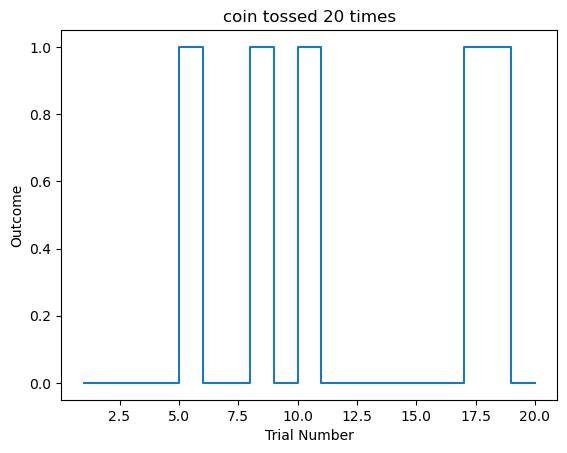

In [5]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.step(x,observation[0],where='pre',data=None)
plt.xlabel('Trial Number')
plt.ylabel('Outcome')
plt.title('coin tossed 20 times')
plt.show()

Observation: The step function represents a jump everytime an outcome 1 occurs in the experiment and downfall to 0 when 0 occurs as the outcome.

Question 1 :Part A:
Using bar graph to represent the outcome VS trial number when coin is tossed 20 times.

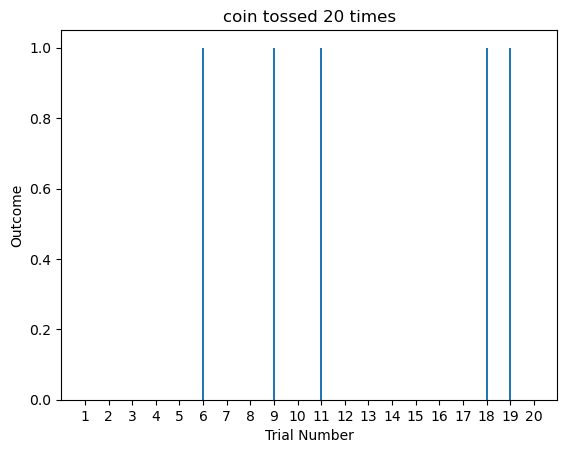

In [6]:
fig1, ax=plt.subplots(nrows=1,ncols=1,sharex=True)
x=[i for i in range(1,21)]
plt.bar(x,observation[0],width=0.08)
plt.xticks(x)
ax.set_xlabel('Trial Number')
ax.set_ylabel('Outcome')
ax.set_title('coin tossed 20 times')
plt.show()

Question 1: part B : 
Using step function to represent the outcomes VS the trial number for the 5 times the experiment is conducted.

In [7]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 5
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])
print(observation)


[[1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]]


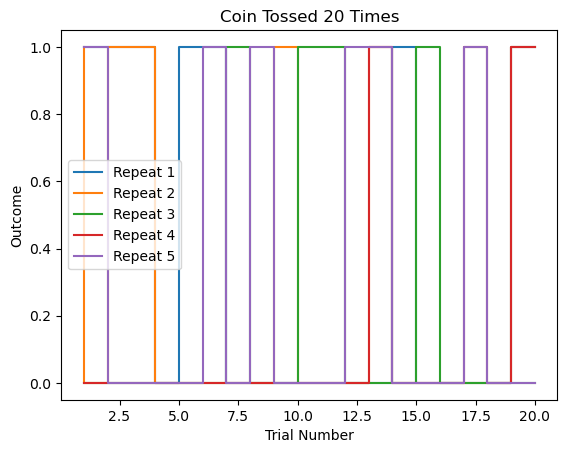

In [8]:
fig, ax = plt.subplots()
for i in range(v_numRepeatsOfExp):
    ax.step(range(1, v_numTrialsInAnExp+1), observation[i], where='pre', label=f"Repeat {i+1}")
ax.set_xlabel('Trial Number')
ax.set_ylabel('Outcome')
ax.set_title('Coin Tossed 20 Times')
ax.legend()
plt.show()

Observation: The graph illustrates the 5 times the experiment is performed and each experiment similar to part A.

Question 1 : part B : same represented using bar graphs which gives a comparitively more clear picture of the outcomes VS the trial number.

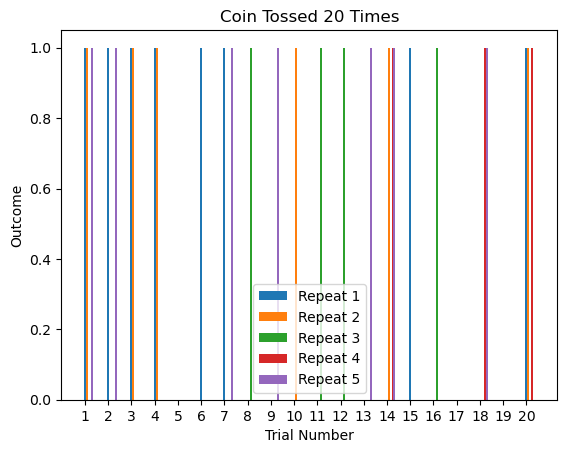

In [9]:
fig1, ax1 = plt.subplots()
x=[i for i in range(1,21)]
for i in range(v_numRepeatsOfExp):
    ax1.bar(np.arange(v_numTrialsInAnExp)+(i)*0.08+1, observation[i],width=0.088, label=f"Repeat {i+1}")
ax1.set_xlabel('Trial Number')
ax1.set_ylabel('Outcome')
ax1.set_title('Coin Tossed 20 Times')
ax1.set_xticks(np.arange(v_numTrialsInAnExp)+1)
ax1.legend()
plt.show()

Question1:part C:Part a performed 100 times

In [10]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 100
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])

print(observation)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


Below graph is the histogram formed for part (C) which represents the frequency of 1(s) on y axis and count of 1(s) on x axis.

[4.0, 4.0, 5.0, 4.0, 1.0, 3.0, 7.0, 6.0, 6.0, 2.0, 3.0, 3.0, 2.0, 8.0, 1.0, 4.0, 7.0, 4.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 6.0, 5.0, 1.0, 3.0, 3.0, 2.0, 4.0, 5.0, 4.0, 4.0, 3.0, 5.0, 7.0, 6.0, 4.0, 4.0, 6.0, 5.0, 4.0, 4.0, 3.0, 6.0, 7.0, 3.0, 3.0, 4.0, 7.0, 5.0, 2.0, 3.0, 4.0, 7.0, 5.0, 8.0, 4.0, 3.0, 3.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 7.0, 5.0, 3.0, 7.0, 3.0, 4.0, 4.0, 4.0, 6.0, 7.0, 6.0, 6.0, 5.0, 4.0, 5.0, 4.0, 6.0, 2.0, 8.0, 4.0, 4.0, 1.0, 4.0, 6.0, 7.0, 4.0, 6.0, 3.0, 6.0]


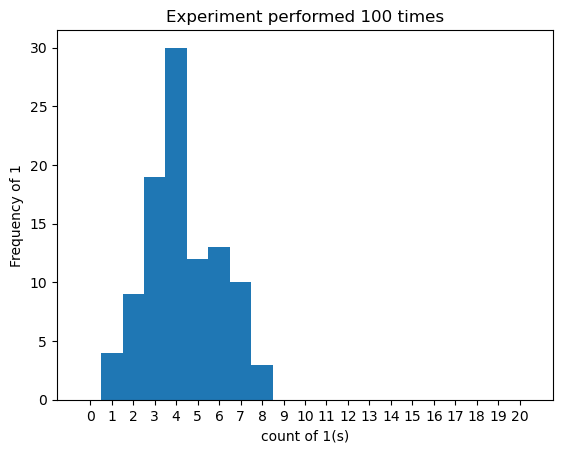

In [11]:
ones=[]
for i in range(v_numRepeatsOfExp):
    sum=0
    for j in range(v_numTrialsInAnExp):
        sum+=observation[i][j]
    ones.append(sum)
print(ones)

plt.hist(ones, bins=np.arange(v_numTrialsInAnExp+2)-0.5)
plt.xticks(range(v_numTrialsInAnExp+1))
plt.xlabel('count of 1(s)')
plt.ylabel('Frequency of 1')
plt.title('Experiment performed 100 times')
plt.show()

Observation part C: The above histogram approximate to a binomial PMF with n=20 and p=0.2 ,here the maximum value obtained on y axis is the frequency of occurance of maximum number of 1(s) in 100 sequences. The above has an expected value 4 by the histogram which can be verified by the formula which is n*p=20*0.2=4

Question 1:Part d:histogram for sequences where sum of 1(s)>=3

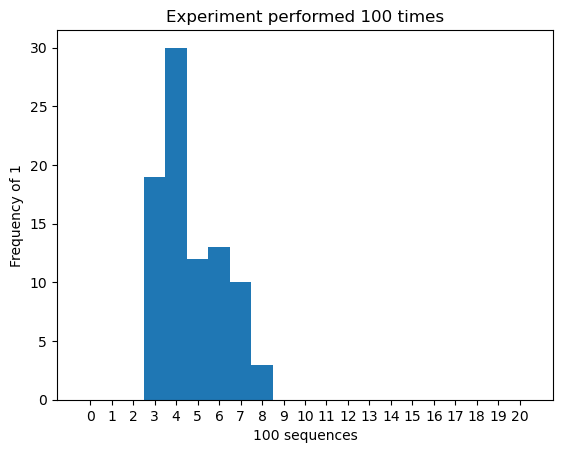

In [12]:
a1=[]
for i in ones:
    if i>=3:
        a1.append(i)
plt.hist(a1,bins=np.arange(v_numTrialsInAnExp+2)-0.5)
plt.xticks(range(v_numTrialsInAnExp+1))
plt.xlabel('100 sequences')
plt.ylabel('Frequency of 1')
plt.title('Experiment performed 100 times')
plt.show()

Observation part D: The above histogram approximate a binomial PMF with parameters n=20 and p=0.2 but only for the subset of sequences that sum to atleast 3. Here we have effectively truncated the binomial distribution by filtering the sequences with fewer than 3 count of 1(s).

Question 2:The below graph represents the histograms for binomial and poisson distributions for 4 valus of aplha between (0,100).

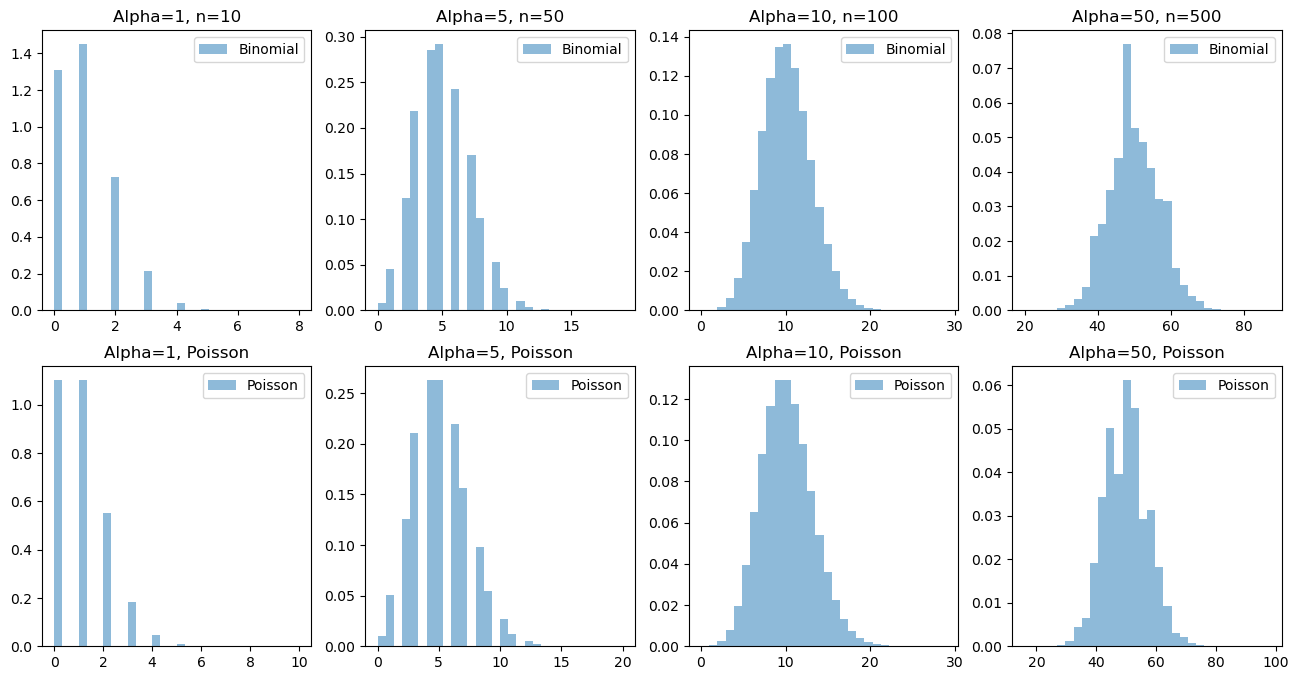

In [15]:
alphas = [1, 5, 10, 50]
ns = [10, 50, 100, 500]
numberOfExperiments=10000000
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i in range(4):
    alpha = alphas[i]
    n = ns[i]
    p = alpha / n    
    binom = np.random.binomial(n, p, size=numberOfExperiments)
    poisson = np.random.poisson(alpha, size=numberOfExperiments)   
    axs[0, i].hist(binom, bins=30, density=True, alpha=0.5, label='Binomial')
    axs[0, i].set_title(f'Alpha={alpha}, n={n}')   
    axs[1, i].hist(poisson, bins=30, density=True, alpha=0.5, label='Poisson')
    axs[1, i].set_title(f'Alpha={alpha}, Poisson')   
    axs[0, i].legend()
    axs[1, i].legend()
    
plt.show()


Observation question 2:  For large enough number of experiments taken 10000000 in the above cases. The Poisson distribution can be obtained from a Binomial 
(n,p) in the limit as n-> infinity with np=alpha.In the above illustrations the n and p are set such that n is large enough and p comes out to very small approx 0.1 in each case. Thus , the binomial and poisson distribution looks almost similar.

Question 3: Illustrating the law of large numbers and the central limit theorem for a sum if iid Poisson RVs.

Observation 3:


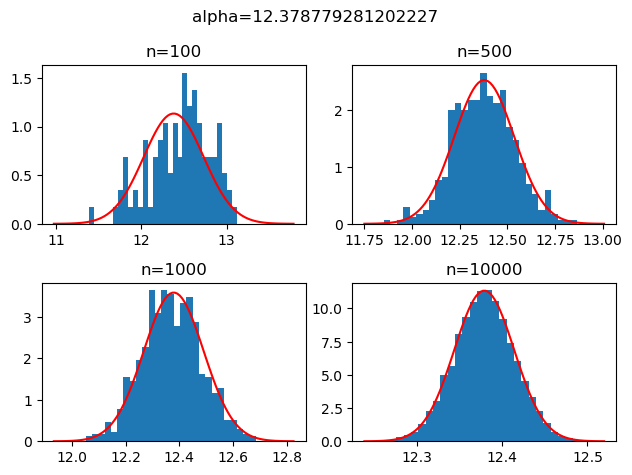

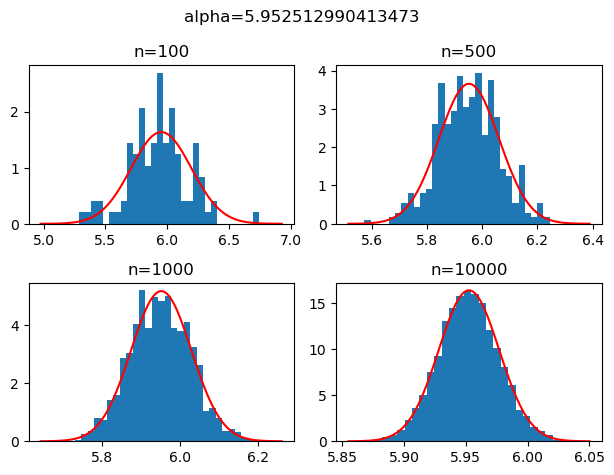

In [14]:
def poisson_rvs(alpha, n):
    return np.random.poisson(alpha, n)

def sample_means(alpha, n, num_samples):
    means = np.zeros(num_samples)
    for i in range(num_samples):
        rv_sum = np.sum(poisson_rvs(alpha, n))
        means[i] = rv_sum / n
    return means

alphas = np.random.uniform(low=1, high=20, size=2)
num_samples = 10000
n_values=[100,500,1000,10000]

for alpha in alphas:
    plt.figure()
    for i, n in enumerate(n_values):
        means = sample_means(alpha, n, n_values[i])
        plt.subplot(2, 2, i+1)
        plt.hist(means, bins=30, density=True)
        plt.title(f'n={n}')
        delta = alpha
        sigma = np.sqrt(alpha/n)
        x = np.linspace(delta - 4*sigma, delta + 4*sigma, 100)
        plt.plot(x, norm.pdf(x, delta, sigma), color='red')
    plt.suptitle(f'alpha={alpha}')
    plt.tight_layout()
    plt.show()


Observation Q3:  The above graphs illustrates that as we increase tha number of trials( as for the 4 long sequences taken above )the histogram converges more and more to a bell shaped curve (proving central limit theorem) and it clusters about its mean/expected value(proving law of large numbers).
